<a href="https://colab.research.google.com/github/steffiangel/ml_lab/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import threading
import warnings
warnings.filterwarnings('ignore')
from mlxtend.frequent_patterns import  fpgrowth
from mlxtend.frequent_patterns import apriori

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df=pd.read_csv('/content/Groceries_dataset - Groceries_dataset.csv')

In [ ]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


<Axes: >

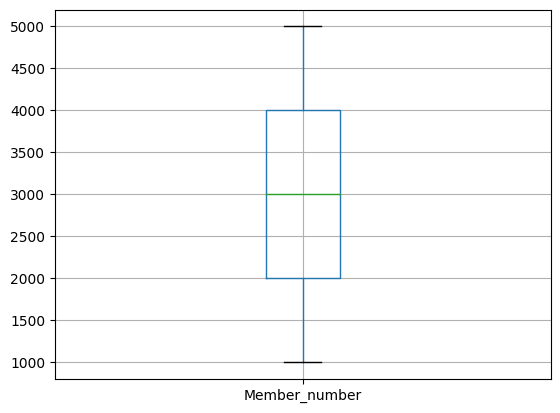

In [ ]:
df.boxplot()

In [ ]:
transactions = []
for index,row in df.iterrows():
  transactions.append(row.dropna().tolist())
transactions

[[1808, '21-07-2015', 'tropical fruit'],
 [2552, '05-01-2015', 'whole milk'],
 [2300, '19-09-2015', 'pip fruit'],
 [1187, '12-12-2015', 'other vegetables'],
 [3037, '01-02-2015', 'whole milk'],
 [4941, '14-02-2015', 'rolls/buns'],
 [4501, '08-05-2015', 'other vegetables'],
 [3803, '23-12-2015', 'pot plants'],
 [2762, '20-03-2015', 'whole milk'],
 [4119, '12-02-2015', 'tropical fruit'],
 [1340, '24-02-2015', 'citrus fruit'],
 [2193, '14-04-2015', 'beef'],
 [1997, '21-07-2015', 'frankfurter'],
 [4546, '03-09-2015', 'chicken'],
 [4736, '21-07-2015', 'butter'],
 [1959, '30-03-2015', 'fruit/vegetable juice'],
 [1974, '03-05-2015', 'packaged fruit/vegetables'],
 [2421, '02-09-2015', 'chocolate'],
 [1513, '03-08-2015', 'specialty bar'],
 [1905, '07-07-2015', 'other vegetables'],
 [2810, '08-09-2015', 'butter milk'],
 [2867, '12-11-2015', 'whole milk'],
 [3962, '18-09-2015', 'tropical fruit'],
 [1088, '30-11-2015', 'tropical fruit'],
 [4976, '17-07-2015', 'bottled water'],
 [4056, '12-06-2015'

In [ ]:

value = df['itemDescription'].value_counts(ascending=False)[:15]
value

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
pastry               785
pip fruit            744
shopping bags        731
canned beer          717
bottled beer         687
Name: itemDescription, dtype: int64

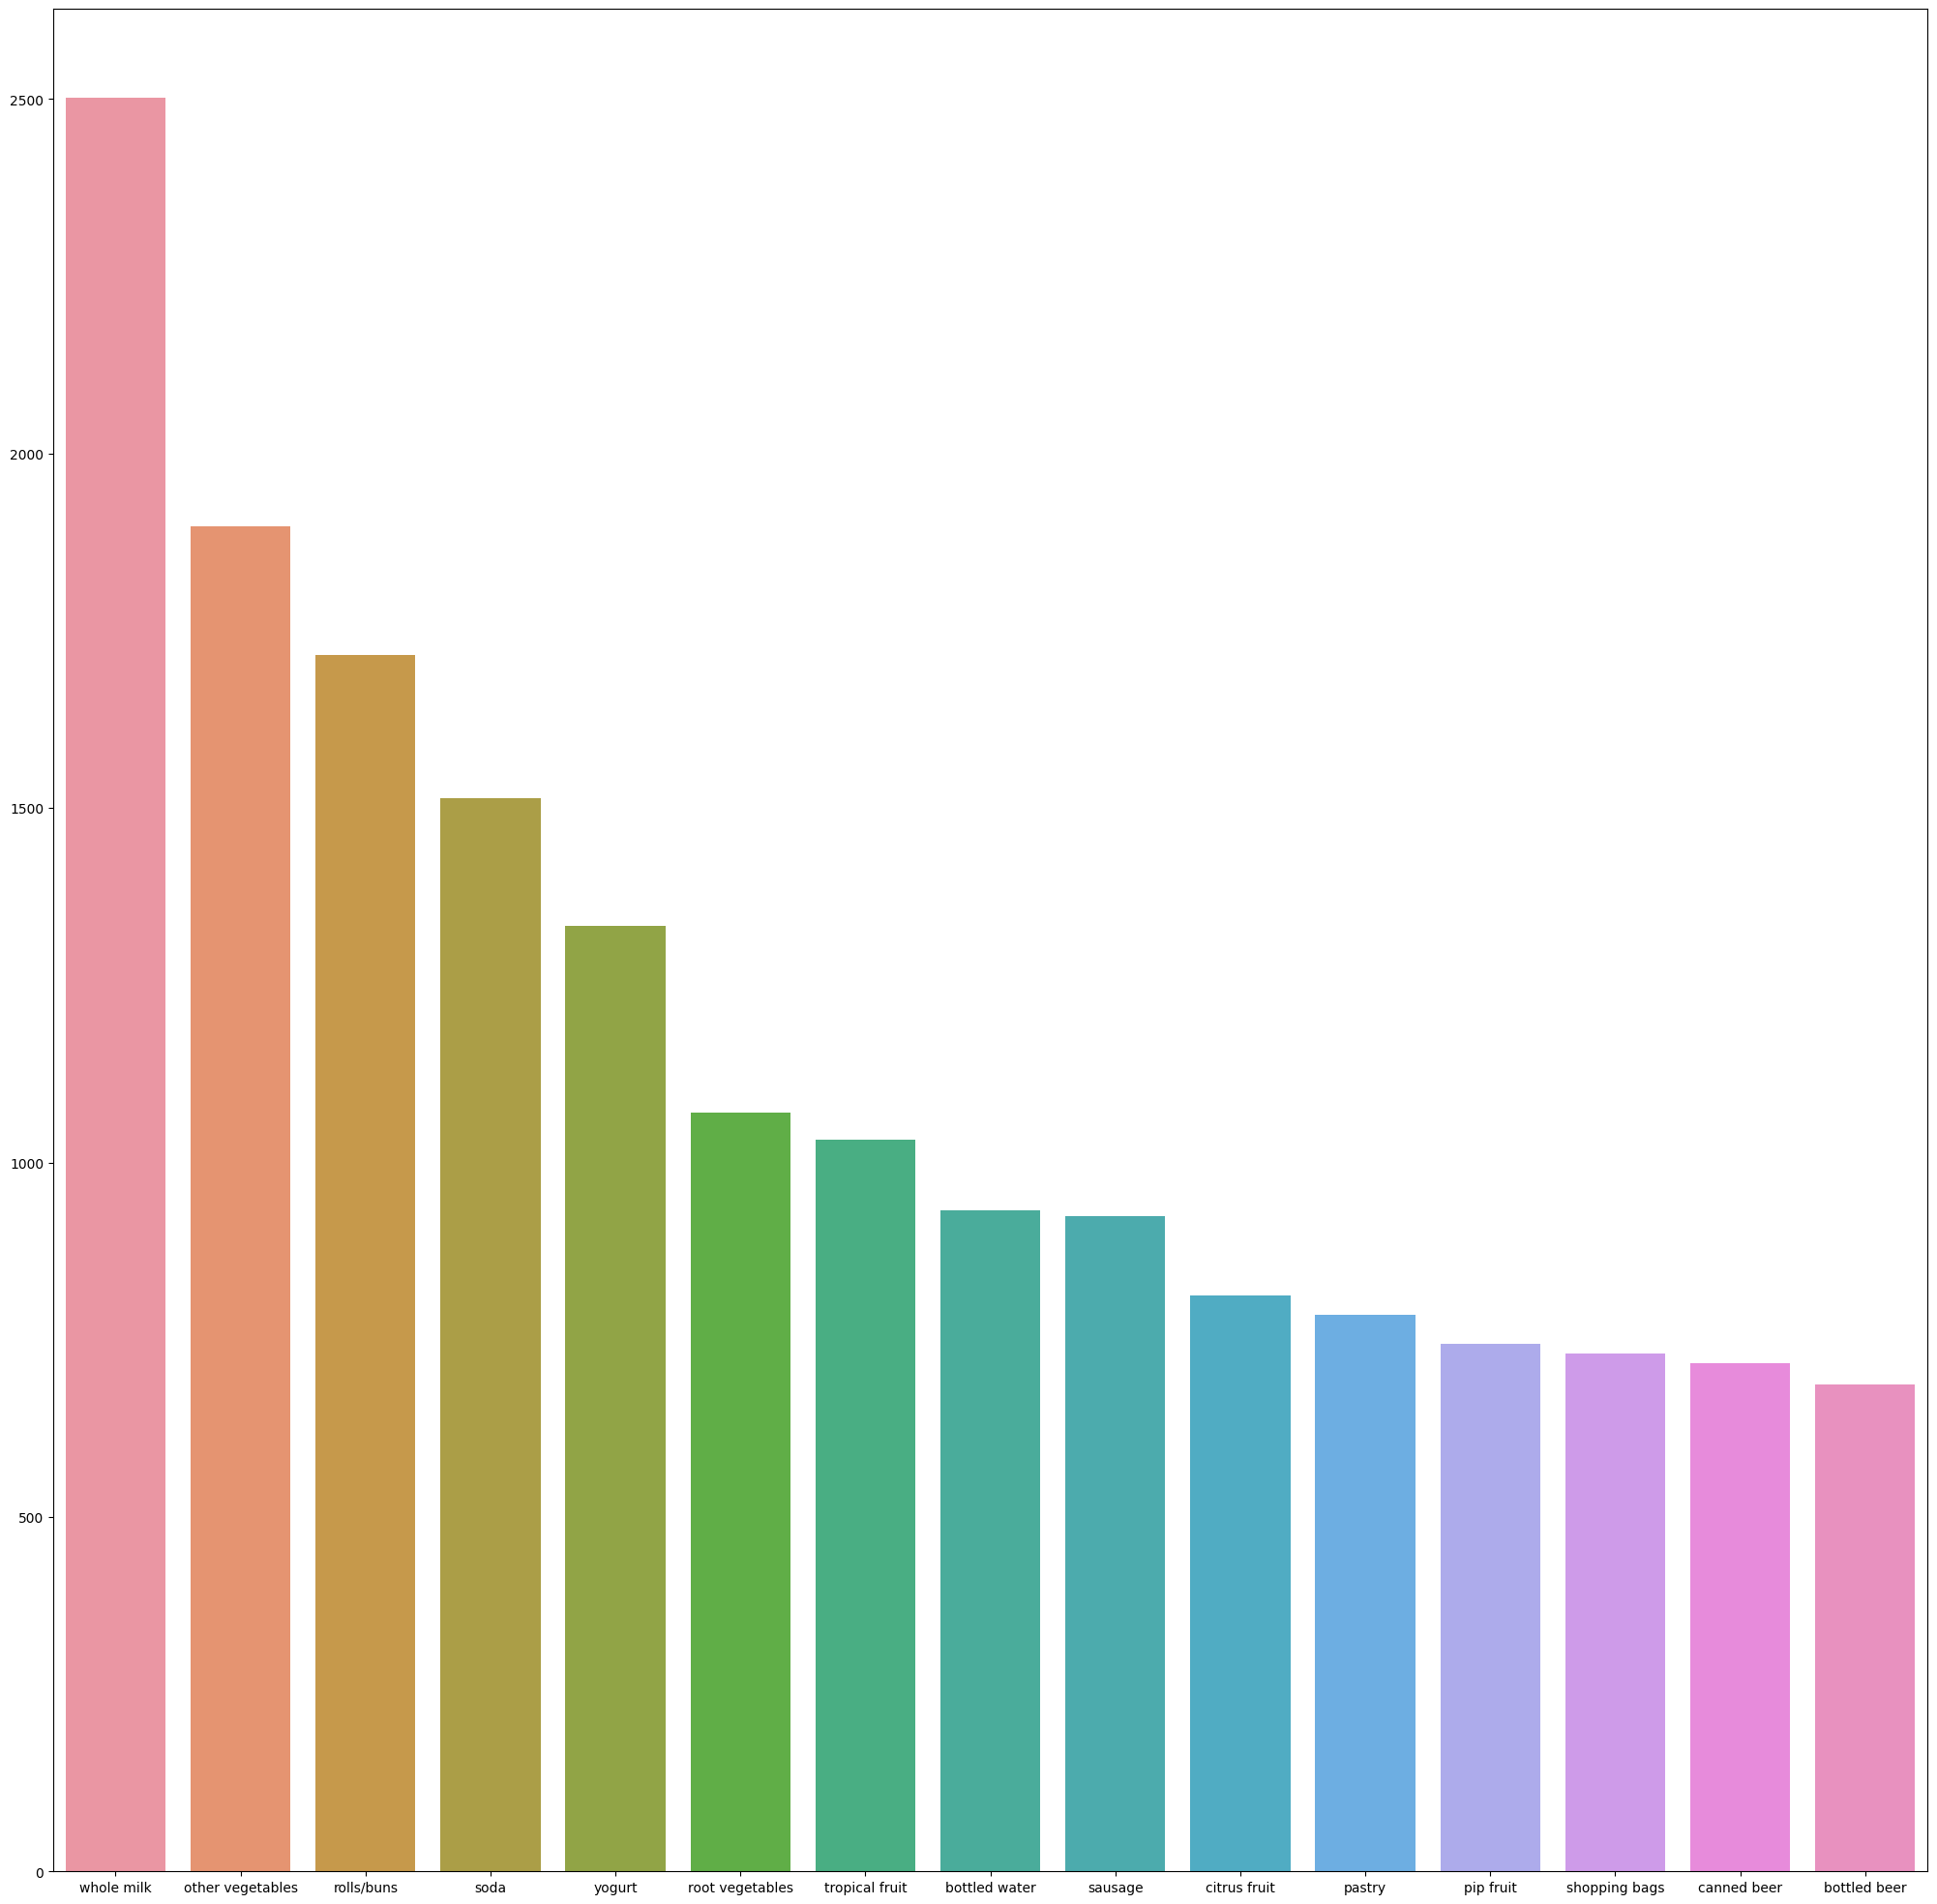

In [ ]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.barplot(x=value.index,y=value.values)
plt.show()

In [ ]:

df['Quantity'] = 1
df

,Member_number,Date,itemDescription,Quantity
0,1808,21-07-2015,tropical fruit,1
1,2552,05-01-2015,whole milk,1
2,2300,19-09-2015,pip fruit,1
3,1187,12-12-2015,other vegetables,1
4,3037,01-02-2015,whole milk,1
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,1
38761,2022,23-02-2014,candy,1
38762,1097,16-04-2014,cake bar,1
38763,1510,03-12-2014,fruit/vegetable juice,1


In [ ]:
transactions = df.groupby(['Member_number','itemDescription'])['Quantity'].sum().unstack().reset_index().set_index('Member_number')
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,2.0,NaN,NaN
1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
4998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

transactions = transactions.fillna(0)
transactions

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode(value):
  if value <= 0:
    return 0
  elif value >= 0:
    return 1

basket_analysis = transactions.applymap(encode)
basket_analysis

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

thread_one = threading.Event()
thread_two = threading.Event()

In [ ]:
execution_time = [0,0]

In [ ]:
def apriori_thread(min_support,min_confidence):
  stime = time.time()
  apriori_results = apriori(basket_analysis,min_support = min_support,use_colnames=True)
  execution_time[0] = time.time()-stime
  thread_one.set()

In [ ]:
def fp_thread(min_support,min_confidence):
  stime = time.time()
  fp_results = fpgrowth(basket_analysis,min_support = min_support,use_colnames=True)
  execution_time[1] = time.time()-stime
  thread_two.set()

In [ ]:

if __name__ == '__main__':
  min_support_ap = float(input("Enter minimum support for apriori algorithm : "))
  min_support_fp = float(input("Enter minimum support for fpgrowth algorithm : "))
  min_confidence_ap = float(input("Enter minimum confidence level for apriori algorithm: "))
  min_confidence_fp = float(input("Enter minimum confidence level for fpgrowth algorithm: "))

Enter minimum support for apriori algorithm : 0.02
Enter minimum support for fpgrowth algorithm : 0.02
Enter minimum confidence level for apriori algorithm: 0.4
Enter minimum confidence level for fpgrowth algorithm: 0.4


In [ ]:
apriorithread = threading.Thread(target=apriori_thread,args=(min_support_ap,min_confidence_ap))
fpthread = threading.Thread(target=fp_thread,args=(min_support_fp,min_confidence_fp))

In [ ]:
apriorithread.start()
fpthread.start()
thread_one.wait()
thread_two.wait()
apriorithread.join()
fpthread.join()

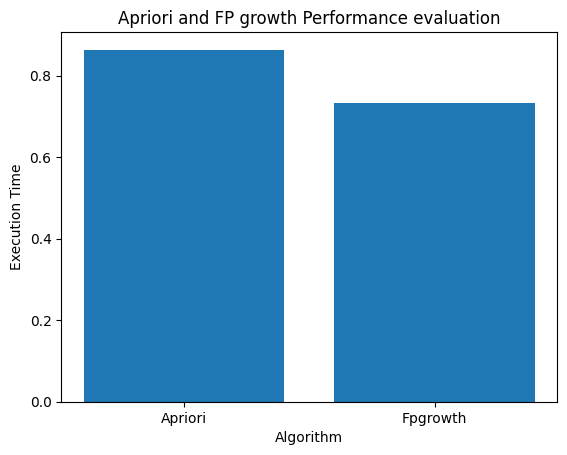

In [ ]:
alg = ['Apriori','Fpgrowth']
plt.bar(alg,execution_time)
plt.xlabel('Algorithm')
plt.ylabel('Execution Time')
plt.title('Apriori and FP growth Performance evaluation')
plt.show()
